<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/05.%20Machine%20Learning/Learn%20-%20Evaluation%20Metrics%20%26%20Hyperparameter%20Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn - Evaluation Metrics & Hyperparameter Tuning
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)

___

# Importing Libraries

In [27]:
# basic
import pandas as pd
import numpy as np
import scipy.stats as stats

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Evaluation Metrics - Classification

## Reading Dataset

In [2]:
path = 'https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/diabetes.csv'

data = pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic Info

In [3]:
data.duplicated().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## EDA

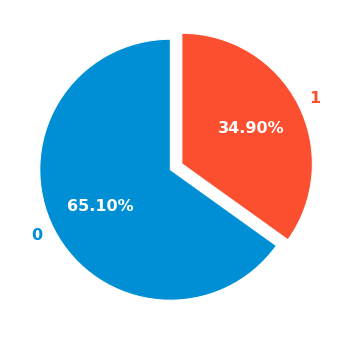

In [23]:
pie_data = data['Outcome'].value_counts(normalize=True)
pie_label = pie_data.index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.show()

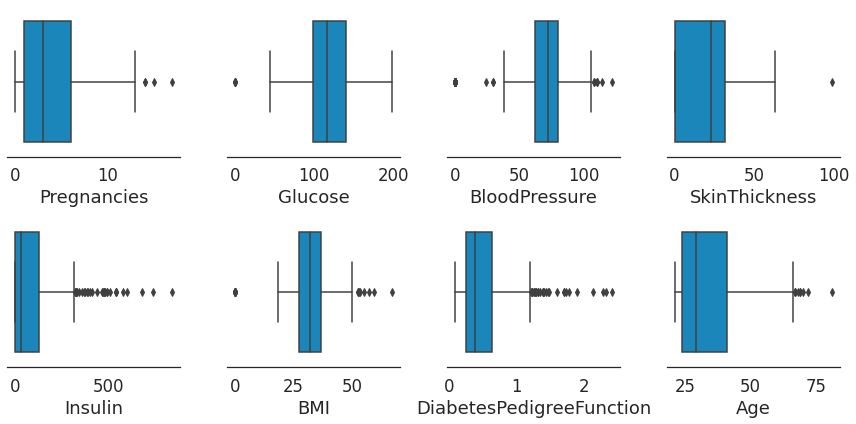

In [10]:
fig, ax = plt.subplots(2,4, figsize=(12,6))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(list(data.columns[:-1])):
  sns.boxplot(data=data, x=col, ax=axes_list[i])

sns.despine(left=True)
plt.tight_layout()
plt.show()

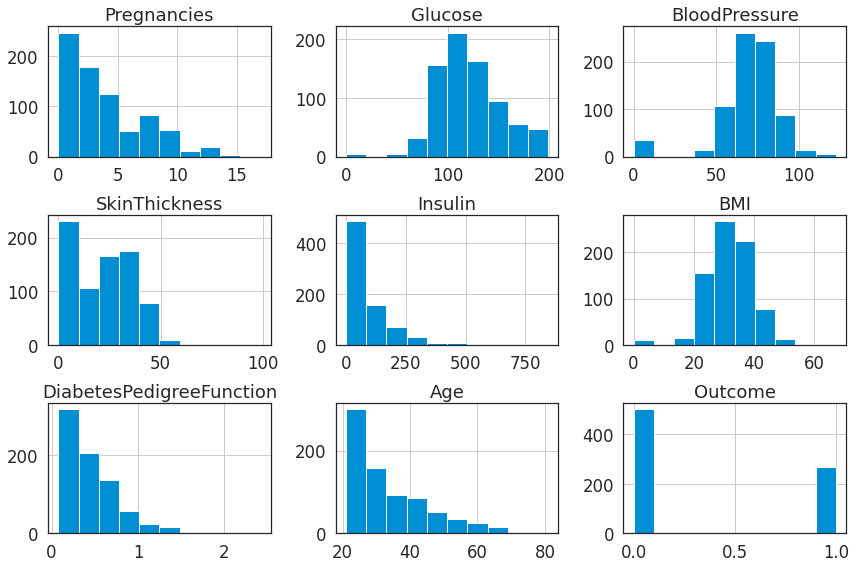

In [16]:
data.hist(figsize=(12,8))

plt.tight_layout()
plt.show()

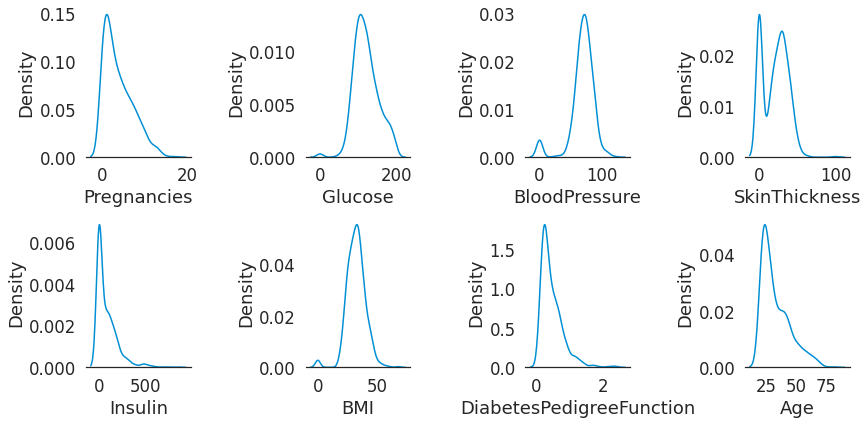

In [14]:
fig, ax = plt.subplots(2,4, figsize=(12,6))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(list(data.columns[:-1])):
  sns.kdeplot(data=data, x=col, ax=axes_list[i])

sns.despine(left=True)
plt.tight_layout()
plt.show()

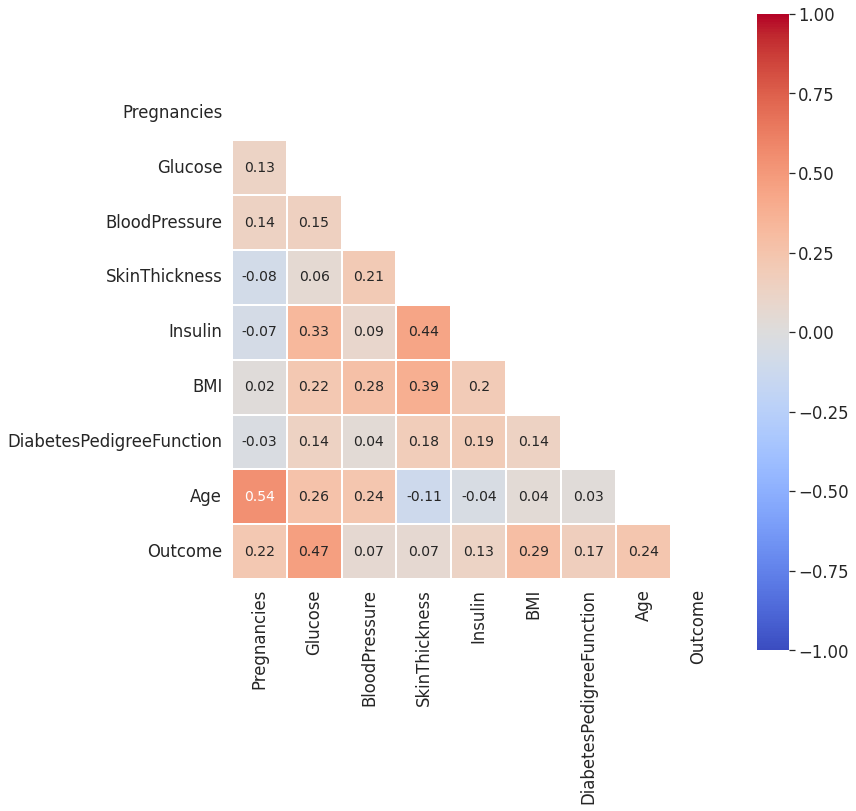

In [21]:
corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr_matrix.round(2), center=0, vmin=-1, vmax=1, mask=mask,
            annot=True, square=True, linewidth=1, cmap='coolwarm',
            annot_kws={'fontsize':14}, ax=ax)

plt.tight_layout()
plt.show()

## Train-Test Split

In [22]:
data_X = data.drop(['Outcome'], axis=1)
data_y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

## Feature Scaling

In [24]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

for i in list(X_train_scale.columns):
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## SMOTE

In [25]:
smote = SMOTE(random_state=0)

X_train_res, y_train_res = smote.fit_resample(X_train_scale, y_train)

## Final Variable

In [26]:
X_train_model = X_train_res.copy()
y_train_model = y_train_res.copy()
X_test_model = X_test_scale.copy()
y_test_model = y_test.copy()

## Modelling

In [30]:
model = RandomForestClassifier(random_state=1)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

## Model Evaluation

### Classification Report

In [32]:
print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.783     0.793     0.788       150
           1      0.608     0.593     0.600        81

    accuracy                          0.723       231
   macro avg      0.695     0.693     0.694       231
weighted avg      0.721     0.723     0.722       231



In [33]:
print('Accuracy\t: ', round(accuracy_score(y_test_model, y_pred),3))
print('Precision\t: ', round(precision_score(y_test_model, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test_model, y_pred, average='macro'),3))

Accuracy	:  0.723
Precision	:  0.695
Recall		:  0.693


### Confusion Matrix
We have to be careful in reading the confusion matrix because the order is not always the same.
<br><br>
Sklearn format can be seen [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [34]:
output_label = dict(zip([0,1], ['Normal', 'Diabetes']))
output_label

{0: 'Normal', 1: 'Diabetes'}

In [38]:
cm = confusion_matrix(y_test_model, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns=output_label, index=output_label, inplace=True)
df_cm

,Normal,Diabetes
Normal,119,31
Diabetes,33,48


In [46]:
tn, fp, fn, tp = confusion_matrix(y_test_model, y_pred).ravel()
print(confusion_matrix(y_test_model, y_pred))
print('')

print("True Positive: ", format(tp))
print("False Positive: ", format(fp))
print("True Negative: ", format(tn))
print("False Negative: ", format(fn))

[[119  31]
 [ 33  48]]

True Positive:  48
False Positive:  31
True Negative:  119
False Negative:  33


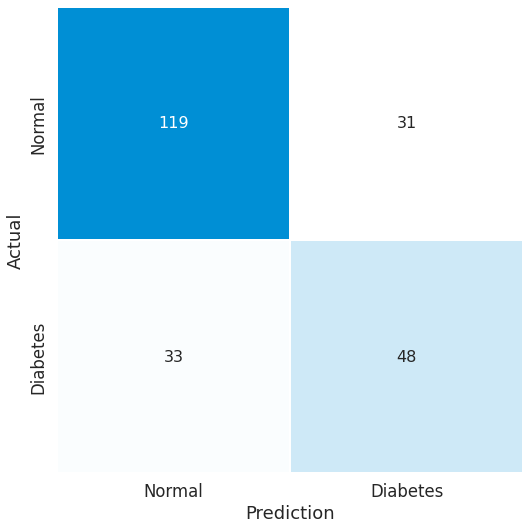

In [49]:
cvals = [0, 1] # color locations
colors = [(1,1,1), (0/255, 143/255, 213/255)] # color values
mapping = list(zip(cvals, colors))
cmap = LinearSegmentedColormap.from_list("", mapping)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f', cbar=False,
            cmap=cmap, linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()